In [8]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

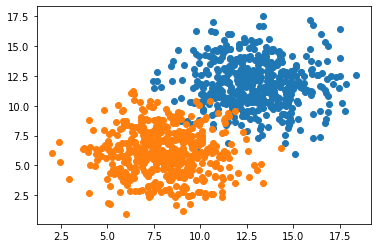

In [9]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [10]:
model = Sequential() # 모델 객체 생성.
model.add(Dense(units = 1, input_shape=(2,), activation='sigmoid')) # Dense는 레이어에 있는 모든 노드들이 전 레이어에 연결되어 있는 것을 말함. output레이어 하나이므로 1. input은 x1, x2이므로 2개, sigmoid모델 사용.
adam = Adam(lr = 0.1) # 저번에 썼던 vanilla gradient descent, 즉 batch gradient descent는 한번 움직일때마다 모든 포인트를 사용해 값을 구함.O(n) 그에 반에 stochastic gradient descent는 하나의 값만 필요로함.
# Adam 알고리즘은 한층 더 나아가 현재 가장 많이 쓰이는 알고리즘임.
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy']) # configuation단계. 아담을 쓰고 error function은 두개의 데이터 타입을(diabetic or healty) 쓰니 binary로 설정. Metrics는 단순히 성능을 측정하는 용도
h = model.fit(x=X, y=Y, verbose=1, batch_size=50, epochs = 50, shuffle='true') # 실제로 트레이닝 단계를 시작하는 코드. x는 포인트들, y는 데이터 타입, verbose는 각 epoch마다의 퍼포먼스를 보여줌. batch는 1의 epoch마다 한단계씩 진행하면 너무 느려지므로
# batch_size 만큼의 포인트를 process하면 라인을 업데이트 함. 이 경우에는 포인트가 총 1000개이므로 배치를 20번 돌려야 1 epoch임. batch_size와 epoch는 데이터의 갯수와 gpu성능에 맞춰 유저가 적당이 설정해 줘야함.
# shuffle의 경우에는 안할 시 gradient descent를 진행하면서 특정(local minimum)에 근접하고 멈출 수 있음. 하지만 원하는 결과는 global minimum에 근접하는 것이므로 데이터를 셔플함으로써 랜덤성을 주는것. 마지막으로
# fit 함수는 accuracy나 loss등 모든 기록이 있는 데이터를 반환해줌.

Epoch 1/50
20/20 [==============================] - 0s 2ms/step - loss: 4.3406 - accuracy: 0.5080
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0860 - accuracy: 0.4970
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.6440
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7310
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7920
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.8570
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8760
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.9180
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.9330
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2845 - accuracy: 0.9370
Epoch 11/50
20/20 [

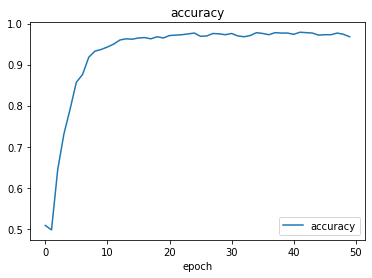

In [11]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

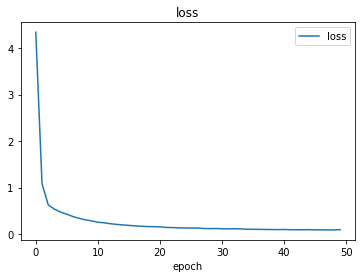

In [12]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [22]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1) #  grid making.
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span) # xx 는 (1, 50) 인 x를 (50, 50) 행렬로 만듬. yy도 똑같음
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_] # xx와 yy를 열로 바꾼 후 concatenate하는 함수.
    pred_func = model.predict(grid) # grid에 있는 모든 점들에 대한 prediction 실행.
    z = pred_func.reshape(xx.shape) # 결과의 모양을 바꿔줌줌
    plt.contourf(xx, yy, z) # 그림으로 나타냄

79/79 [==============================] - 0s 2ms/step


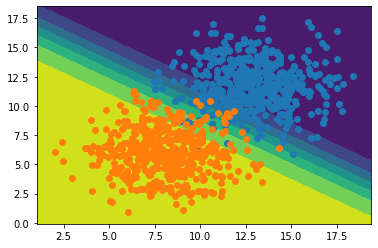

In [23]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 45ms/step
Prediction is: [[0.9964002]]


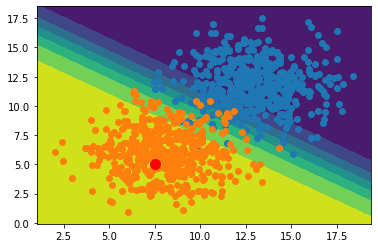

In [26]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker="o", markersize=10, color="red") # 새로운 input point에 대해 prediction 하고 marker = o 모양으로 그래프에 나타냄
print("Prediction is:", prediction)